# Coding Day 2

First let's import our packages:

In [1]:
#import library:
%matplotlib widget #this makes our plots interactive

import numpy as np
import matplotlib.pyplot as plt

## Random Walks

A random walk in 1D has a few simple steps:
1. Start with a point at an arbitrary initial position; usually set to zero: $x_0 = 0$ 
2. Recursively (for all $i \in \{0,1,2,3,...\}$):
    + Randomly, but with equal probability, choose either $\Delta{x_i}=+1$ or $\Delta{x_i}-1$ (i.e flip a coin)  
    + Update your current position: $x_{i+1} = x_i + \Delta{x_i}$

You can repeat this process indefinitely, or you can stop at some integer step $i=N$ of your choice. In either case the result is a point that jumps around in integers one step at a time, in completely random order. 

We can code this. We'll start with an example that doesn't quite work, then apply a slight fix.

In [2]:
##Step 1: Initial condition
# Choose your initial position, and append to storage:
x = 0
x_s = np.array([x]) #storage array

##Step2: Walk
#Pick how many steps you want to run the random walk
N = 10
for i in range(N):
    Delta_x = np.random.randint(-1,1) #generate a random integer
    print(f"Delta_x{i} = {Delta_x}")
    x += Delta_x #add it to your position
    x_s = np.append(x_s,x) #append new position to array

#print the result
print(x_s)
    


Delta_x0 = -1
Delta_x1 = -1
Delta_x2 = 0
Delta_x3 = -1
Delta_x4 = 0
Delta_x5 = 0
Delta_x6 = -1
Delta_x7 = 0
Delta_x8 = 0
Delta_x9 = -1
[ 0 -1 -2 -2 -3 -3 -3 -4 -4 -4 -5]


Looks like we got jumps of $\Delta_x = 0$ and/or $\Delta_x = -1$, but not $\Delta_x = +1$, why's that?

`np.random.randint(a,b)` generates random integers on the half open interval $[a,b)$, meaning we're only getting integers in the set $\{-1,0\}$. Meanwhile, we want integers either $-1$ or $+1$. A possible solution, among many, is to just random sample 2 possible integers of our choice $\{a,b\}$, and remap them to $\{-1,1\}$. 

So let's do `np.random.randint(0,2)` to get either $0$ or $1$, and we remap $0 \rightarrow -1$. 

In [3]:
##Step 1: Initial condition
# Choose your initial position, and append to storage:
x = 0
x_s = np.array([x]) #storage array

##Step2: Walk
#Pick how many steps you want to run the random walk
N = 10
for i in range(N):
    Delta_x = np.random.randint(0,2) #generate either 0 or 1 with 50% probability
    if Delta_x == 0: 
        Delta_x = -1 #remap 0 to -1
    print(f"Delta_x{i} = {Delta_x}")
    x += Delta_x #add to position
    x_s = np.append(x_s,x) #append new position to array

#print the result
print(x_s)

Delta_x0 = 1
Delta_x1 = -1
Delta_x2 = -1
Delta_x3 = -1
Delta_x4 = 1
Delta_x5 = -1
Delta_x6 = 1
Delta_x7 = 1
Delta_x8 = 1
Delta_x9 = -1
[ 0  1  0 -1 -2 -1 -2 -1  0  1  0]


Instead of printing, a useful thing to do would be to plot our data. We can do this using `matplotlib.pyplot`.

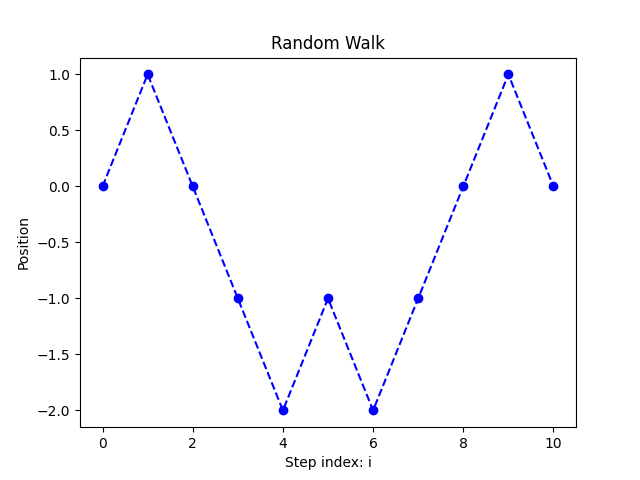

In [4]:
plt.figure()
plt.plot(x_s, 'bo--')
plt.title("Random Walk")
plt.ylabel("Position")
plt.xlabel("Step index: i")
plt.show()

### Exercise:

Define a function that: 
* takes in as input: 
    + initial position `x_0` 
    + number of steps `N`
* returns: 
    + an array of positions throughout a random walk
    + a plot of the positions over "time"

\* **You have 5-10 mins** \*

### My Answer:

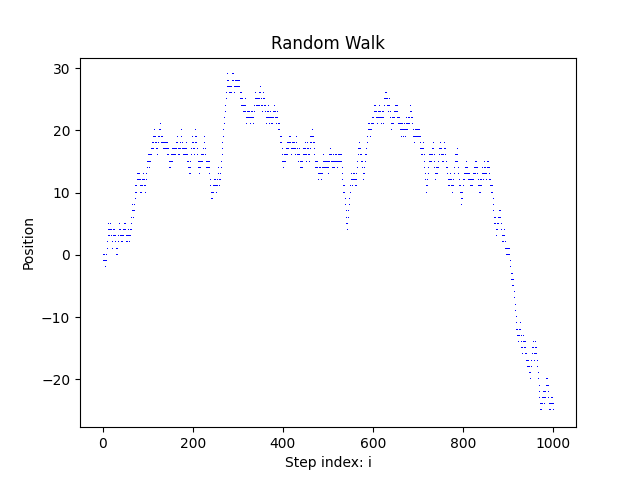

[  0  -1   0 ... -24 -25 -24]


In [5]:
def randWalk(x_0,N, Plot=True):
    ##Step 1: Initial condition
    x = x_0
    x_s = np.array([x]) #storage array

    ##Step2: Walk
    for i in range(N):
        Delta_x = np.random.randint(0,2) 
        if Delta_x == 0:
            Delta_x = -1 
        x += Delta_x
        x_s = np.append(x_s,x)
    
    ##Plot:
    if Plot == True:
        plt.figure()
        plt.plot(x_s, 'b,')
        plt.title("Random Walk")
        plt.ylabel("Position")
        plt.xlabel("Step index: i")
        plt.show()

    #Return the array
    return x_s

randomWalk_x = randWalk(0,1000)
print(randomWalk_x)

## Generating Many Random Walks

To study how random walks behave longterm and in larger sample size, we can run many random walks, and analyse the data we get from those. In a sense, we'll be studying the "average" or "expected" behaviour of random walks.

A common thing to track here is the final position after some number of steps, $N$. We can choose an integer $M$, say $M=100$, of random walks to generate, and we'll run each one for, say $N = 100$, steps. Further, we'll start random walk from the same position, $x_0=0$.

We'll also use our function `randWalk` above to streamline the look of our code.


In [6]:
M = 100
N = 100
x_0 = 0

#Create an array to store the random-walk arrays:
Walks = np.ndarray((M,N+1)) #M rows (1 for each randomwalk), N+1 columns (1 for each step; including the 0-th)
for j in range(M):
    x_s = randWalk(x_0,N, Plot = False) #run the random walk
    Walks[j,:] = x_s #set the j-th column equal to x_s
print(Walks)

[[ 0.  1.  0. ... 14. 15. 14.]
 [ 0.  1.  0. ...  4.  5.  6.]
 [ 0. -1. -2. ... -4. -5. -6.]
 ...
 [ 0. -1. -2. ... -2. -3. -2.]
 [ 0. -1. -2. ...  4.  5.  4.]
 [ 0.  1.  0. ...  8.  7.  8.]]


Now we have the data for 100 random walks, of 100 steps (i.e 101 positions, including the 0-th).

We'd like to visualize this data. We could try plotting all of it:

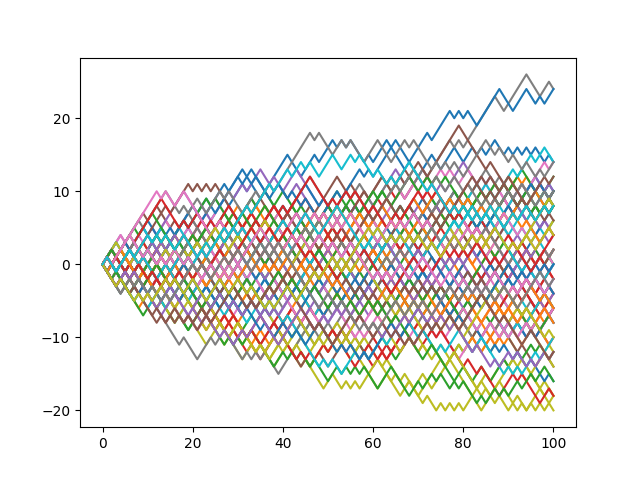

In [7]:
plt.figure()
for j in range(len(Walks)):
    plt.plot(Walks[j,:])
plt.show()

That looks quite pretty, from all the different colors, but we'd like too see something not quite as messy.
The standard thing to do here is actually visualize the distribution of positions at a particular point in time, usually the last time step.

We can do this with a histogram.

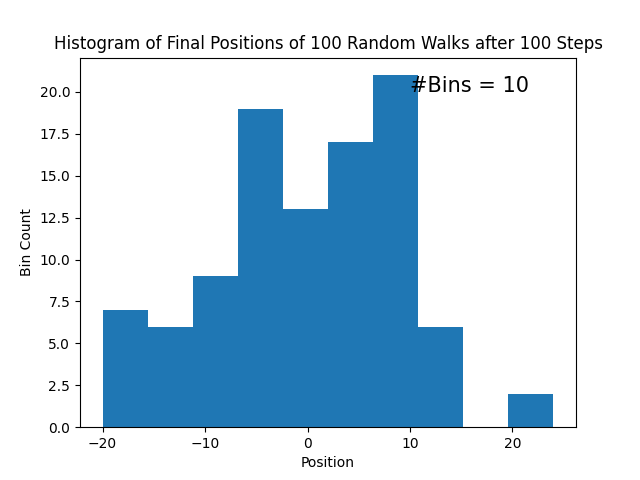

In [8]:
#The number of bins to put in our Histogram.
num_bins = int(np.floor(np.sqrt(M)))

plt.figure()
plt.hist(Walks[:,-1], bins = num_bins)
plt.title(f"Histogram of Final Positions of {M} Random Walks after {N} Steps")
plt.xlabel("Position")
plt.ylabel("Bin Count")
plt.text(10,20,f"#Bins = {num_bins}",fontsize = 15)
plt.show()

### Exercise:

Again make a function that will replicate the histogram procedure above, for:
* Input: 
    + Initial position: `x_0`
    + Number of walks: `M`
    + Number of steps: `N`
* Return:
    + 2D-Array (shape (M,N+1)) of random walks
    + A histogram of final positions

\* **You have 5-10 mins** \*

### My Answer:

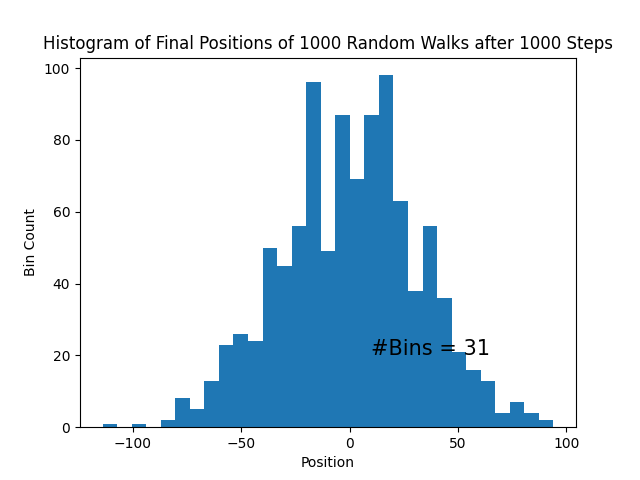

In [9]:
def MonteCarlo_randWalk(x_0,M,N, plot_MC = True):
    #Create an array to store the random-walk arrays:
    Walks = np.ndarray((M,N+1)) #M rows (1 for each randomwalk), N+1 columns (1 for each step; including the 0-th)
    for j in range(M):
        x_s = randWalk(x_0,N, Plot = False) #run the random walk
        Walks[j,:] = x_s #set the j-th column equal to x_s
    
    #The number of bins to put in our Histogram.
    num_bins = int(np.floor(np.sqrt(M)))

    if plot_MC == True:
        plt.figure()
        plt.hist(Walks[:,-1], bins = num_bins)
        plt.title(f"Histogram of Final Positions of {M} Random Walks after {N} Steps")
        plt.xlabel("Position")
        plt.ylabel("Bin Count")
        plt.text(10,20,f"#Bins = {num_bins}",fontsize = 15)
        plt.show()
    
    return Walks

Walks = MonteCarlo_randWalk(0,1000,1000,plot_MC = True)

And when you run it for a really long time...

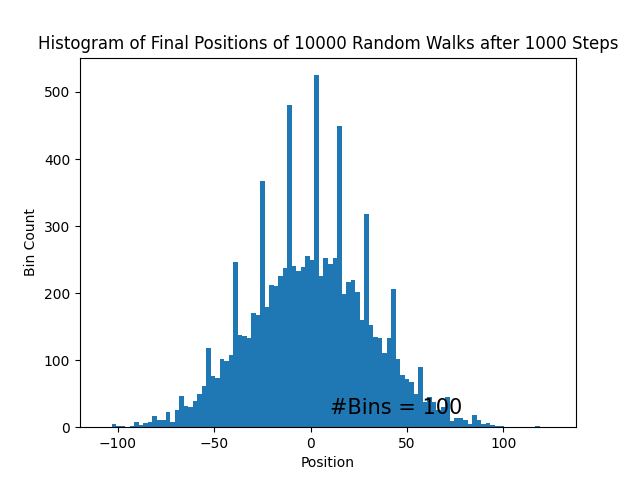

[[  0.   1.   2. ... -44. -45. -46.]
 [  0.   1.   2. ...   0.   1.   0.]
 [  0.  -1.  -2. ...  50.  49.  48.]
 ...
 [  0.  -1.  -2. ... -18. -19. -20.]
 [  0.  -1.   0. ... -34. -35. -36.]
 [  0.  -1.  -2. ...  54.  55.  54.]]


In [10]:
Walks = MonteCarlo_randWalk(0,10000,1000,plot_MC = True)
print(Walks)

## Extra: N-Dimensional Random Walk

Our random walk procedure can be generalized to more than 1 dimension. Instead of considering steps on just one x-axis, we can consider steps on a further y-axis or even additional z-axis. 

The position is then stored as a vector:
$$\vec{r} = \left[\begin{matrix}
x_i \\
y_i \\
z_i
\end{matrix}\right]$$

or in Python, as a `numpy.array`:

Looks like a row vector: [0 0 0]


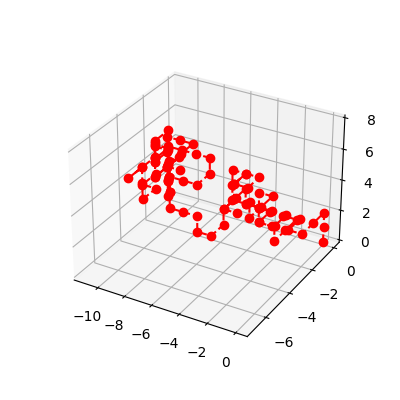

[[  0   0   0]
 [  0   0   1]
 [  0   0   2]
 [  0  -1   2]
 [  0  -2   2]
 [ -1  -2   2]
 [ -1  -1   2]
 [ -2  -1   2]
 [ -2  -2   2]
 [ -2  -2   1]
 [ -2  -1   1]
 [ -2   0   1]
 [ -3   0   1]
 [ -4   0   1]
 [ -4  -1   1]
 [ -3  -1   1]
 [ -4  -1   1]
 [ -4  -1   2]
 [ -5  -1   2]
 [ -6  -1   2]
 [ -6  -1   3]
 [ -6  -1   4]
 [ -5  -1   4]
 [ -5  -2   4]
 [ -4  -2   4]
 [ -4  -1   4]
 [ -5  -1   4]
 [ -5  -2   4]
 [ -5  -2   3]
 [ -5  -1   3]
 [ -5  -1   2]
 [ -4  -1   2]
 [ -3  -1   2]
 [ -4  -1   2]
 [ -4  -1   3]
 [ -3  -1   3]
 [ -3  -2   3]
 [ -3  -3   3]
 [ -3  -3   4]
 [ -3  -4   4]
 [ -4  -4   4]
 [ -4  -3   4]
 [ -4  -4   4]
 [ -4  -4   3]
 [ -4  -5   3]
 [ -5  -5   3]
 [ -5  -5   4]
 [ -6  -5   4]
 [ -7  -5   4]
 [ -7  -5   5]
 [ -7  -5   6]
 [ -7  -5   7]
 [ -7  -5   6]
 [ -7  -5   5]
 [ -7  -5   6]
 [ -6  -5   6]
 [ -5  -5   6]
 [ -5  -4   6]
 [ -5  -4   7]
 [ -6  -4   7]
 [ -7  -4   7]
 [ -8  -4   7]
 [ -8  -4   8]
 [ -8  -5   8]
 [ -8  -5   7]
 [ -8  -6   7]
 [ -8  -7 

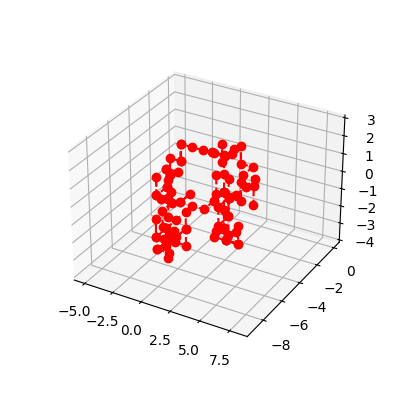

[[ 0  0  0]
 [ 0 -1  0]
 [-1 -1  0]
 [-2 -1  0]
 [-3 -1  0]
 [-4 -1  0]
 [-4 -1 -1]
 [-4 -1  0]
 [-4 -1 -1]
 [-5 -1 -1]
 [-5 -1 -2]
 [-5 -1 -3]
 [-5 -2 -3]
 [-4 -2 -3]
 [-4 -3 -3]
 [-4 -3 -4]
 [-3 -3 -4]
 [-3 -4 -4]
 [-2 -4 -4]
 [-1 -4 -4]
 [-1 -4 -3]
 [-1 -5 -3]
 [-1 -4 -3]
 [-1 -4 -2]
 [-1 -5 -2]
 [-1 -6 -2]
 [-1 -6 -3]
 [-1 -6 -2]
 [-1 -7 -2]
 [-1 -7 -1]
 [-1 -7 -2]
 [ 0 -7 -2]
 [ 0 -8 -2]
 [ 0 -7 -2]
 [ 0 -7 -3]
 [ 0 -7 -2]
 [ 0 -8 -2]
 [ 1 -8 -2]
 [ 1 -8 -1]
 [ 1 -8  0]
 [ 1 -8  1]
 [ 1 -8  2]
 [ 1 -7  2]
 [ 0 -7  2]
 [ 0 -7  1]
 [ 0 -7  2]
 [ 0 -7  1]
 [ 0 -8  1]
 [ 0 -8  2]
 [ 0 -8  1]
 [ 1 -8  1]
 [ 2 -8  1]
 [ 2 -7  1]
 [ 2 -8  1]
 [ 3 -8  1]
 [ 4 -8  1]
 [ 4 -7  1]
 [ 4 -6  1]
 [ 5 -6  1]
 [ 5 -5  1]
 [ 5 -4  1]
 [ 4 -4  1]
 [ 4 -3  1]
 [ 3 -3  1]
 [ 3 -3  2]
 [ 3 -4  2]
 [ 3 -5  2]
 [ 3 -5  3]
 [ 3 -6  3]
 [ 4 -6  3]
 [ 4 -6  2]
 [ 4 -6  1]
 [ 4 -7  1]
 [ 4 -6  1]
 [ 4 -6  0]
 [ 4 -6 -1]
 [ 4 -7 -1]
 [ 5 -7 -1]
 [ 6 -7 -1]
 [ 5 -7 -1]
 [ 5 -6 -1]
 [ 5 -7 -1]
 [ 6 -7 -1]
 [ 6

In [11]:
def nd_randWalk(r_0,Num_steps, plot = True):
    n = np.shape(r_0)[0]
    
    r_s = np.array([r_0])
    r = np.copy(r_0)
    
    N = Num_steps
    for i in range(N):
        Delta = np.random.randint(0,2)
        if Delta == 0:
            Delta = -1

        j = np.random.randint(0,n) #0 -> x, 1 -> y, 2 -> z, ... , (n-1) -> w
        r[j] += Delta
        r_s = np.append(r_s,[r],axis = 0)

    if plot == True:
        fig = plt.figure(figsize = (4,4))
        ax = fig.add_subplot(111, projection = '3d')
        ax.plot(r_s[:,0],r_s[:,1],r_s[:,2], 'ro--')
        plt.show()

    return r_s

r_0 = np.array([0,0,0]) #1 row, 3 column, all zeros.
print(f"Looks like a row vector: {r_0}")


r_s = nd_randWalk(r_0,100, plot = True)
print(r_s)
r_s = nd_randWalk(r_0,100,plot=True)
print(r_s)

With this function we can do random-walks in any number of dimensions, even more than 3, although then we can't plot it.

In [12]:
r_0 = np.array([0,0,0,0,0])
r_s = nd_randWalk(r_0,100000,plot = False)
print(r_s)

[[   0    0    0    0    0]
 [   0    1    0    0    0]
 [   0    1    0   -1    0]
 ...
 [-132  137   96   93 -172]
 [-132  137   96   93 -173]
 [-132  137   96   93 -172]]


We can't histogram or draw this in the usual sense, as in 1,2, or 3d, but we can visualize the distance from the center over time, by calculating:

$$r = \sqrt{x^2 + y^2 + z^2 + ... + w^2}$$

at each step in the random walk.


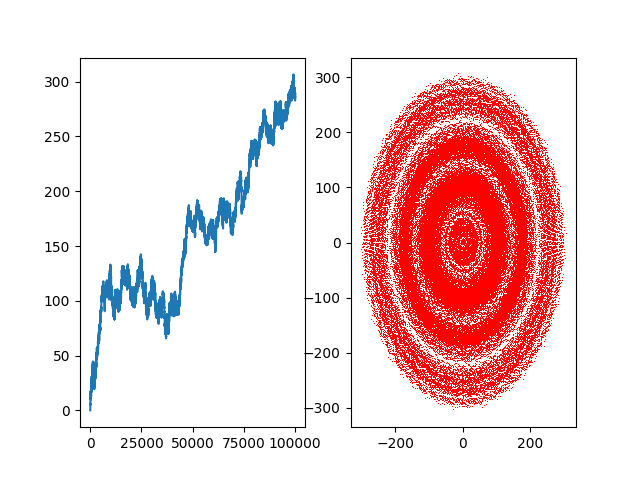

In [13]:
r_sq = np.array([np.sum(r_s[i]**2) for i in range(len(r_s))])
r = np.sqrt(r_sq)
figure, ax = plt.subplots(1,2)
ax[0].plot(r)

x = np.array([r[i]*np.cos(i) for i in range(len(r))])
y = np.array([r[i]*np.sin(i) for i in range(len(r))])
ax[1].plot(x,y,'r,')
plt.show()

We can even make another function that will histogram, but this is best visualized for the 2d Random Walk.

**Fact:** You don't need to use `matplotlib` to compute histograms; numpy does can histogram too, and in arbitrary dimensions.

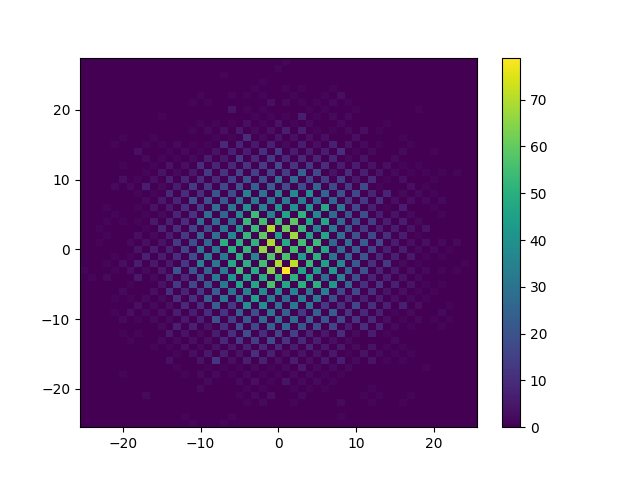

[[[ 0.  0.]
  [ 1.  0.]
  [ 1.  1.]
  ...
  [-4.  4.]
  [-4.  5.]
  [-4.  6.]]

 [[ 0.  0.]
  [ 0.  1.]
  [ 0.  0.]
  ...
  [-1. -3.]
  [ 0. -3.]
  [ 1. -3.]]

 [[ 0.  0.]
  [ 0.  1.]
  [ 0.  2.]
  ...
  [-3.  5.]
  [-3.  4.]
  [-4.  4.]]

 ...

 [[ 0.  0.]
  [-1.  0.]
  [-1.  1.]
  ...
  [-9.  3.]
  [-9.  4.]
  [-9.  5.]]

 [[ 0.  0.]
  [-1.  0.]
  [ 0.  0.]
  ...
  [10.  6.]
  [10.  5.]
  [10.  6.]]

 [[ 0.  0.]
  [-1.  0.]
  [-1.  1.]
  ...
  [ 7. -3.]
  [ 6. -3.]
  [ 7. -3.]]]


In [14]:

def nd_MonteCarlo_randWalk(r_0,M,N, plot_MC = True):
    n = np.shape(r_0)[0]

    #Create an array to store the random-walk arrays:
    Walks = np.ndarray((M,N+1,n)) #M rows (1 for each randomwalk), N+1 columns (1 for each step; including the 0-th)
    for j in range(M):
        r_s = nd_randWalk(r_0,N, plot = False) #run the random walk
        Walks[j] = r_s #set the j-th entry equal to r_s
    
    if n == 1:
        if plot_MC == True:
            #The number of bins to put in our Histogram.
            num_bins = int(np.floor(np.sqrt(M)))

            plt.figure()
            hist,bins = plt.hist(Walks[:,-1], bins = num_bins)
            plt.title(f"Histogram of Final Positions of {M} Random Walks after {N} Steps")
            plt.xlabel("Position")
            plt.ylabel("Bin Count")
            plt.text(10,20,f"#Bins = {num_bins}",fontsize = 15)
            plt.show()
    elif n == 2:
        if plot_MC ==True:
            x = Walks[:,-1,0]
            y = Walks[:,-1,1]
            #nx = int(np.max(x)-np.min(x) - 1 )
            #ny = int(np.max(y)-np.min(y) - 1)
            xedges = np.arange(np.min(x)-0.5,np.max(x)+0.5,1)
            yedges = np.arange(np.min(y)-0.5,np.max(y)+0.5,1)
            plt.figure()
            hist = plt.hist2d(x,y,bins = (xedges,yedges))
            plt.colorbar()
            plt.show()
    elif n >= 3:
        
        hist = np.histogramdd(Walks[-1,:,:])

        if plot_MC == True:
            print("Error: plot_MC = True. Unable to plot in 4d or above.")

    return Walks,hist

Walks,hist = nd_MonteCarlo_randWalk(np.array([0,0]),10000,100, plot_MC=True)
print(Walks)

In [15]:
histogram = hist[0]
x_bin_edges = hist[1]
y_bin_edges = hist[2]
print(f"histogram = {histogram}")
print(f"x_bin_edges = {x_bin_edges}")
print(f"y_bin_edges = {y_bin_edges}")

histogram = [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
x_bin_edges = [-25.5 -24.5 -23.5 -22.5 -21.5 -20.5 -19.5 -18.5 -17.5 -16.5 -15.5 -14.5
 -13.5 -12.5 -11.5 -10.5  -9.5  -8.5  -7.5  -6.5  -5.5  -4.5  -3.5  -2.5
  -1.5  -0.5   0.5   1.5   2.5   3.5   4.5   5.5   6.5   7.5   8.5   9.5
  10.5  11.5  12.5  13.5  14.5  15.5  16.5  17.5  18.5  19.5  20.5  21.5
  22.5  23.5  24.5  25.5]
y_bin_edges = [-25.5 -24.5 -23.5 -22.5 -21.5 -20.5 -19.5 -18.5 -17.5 -16.5 -15.5 -14.5
 -13.5 -12.5 -11.5 -10.5  -9.5  -8.5  -7.5  -6.5  -5.5  -4.5  -3.5  -2.5
  -1.5  -0.5   0.5   1.5   2.5   3.5   4.5   5.5   6.5   7.5   8.5   9.5
  10.5  11.5  12.5  13.5  14.5  15.5  16.5  17.5  18.5  19.5  20.5  21.5
  22.5  23.5  24.5  25.5  26.5  27.5]
